In [270]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [271]:
data = pd.read_excel("data/Data_Train.xlsx")
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [272]:
# Missing values
data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [273]:
data.shape

(10683, 11)

In [274]:
# since only 2 values are missing, delete the row
# Get the null val
data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [275]:
data.dropna(inplace=True)

In [276]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [277]:
tmp_data = data.copy()
tmp_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Convert "Date of Journey" to seperate columns

In [278]:
tmp_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [279]:
def change_into_datetime(col):
  tmp_data[col] = pd.to_datetime(tmp_data[col])

for feature in ["Date_of_Journey", "Dep_Time", "Arrival_Time"]:
  change_into_datetime(feature)

/Library/Python/3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Library/Python/3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Library/Python/3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Library/Python/3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Library/Python/3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '24/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=

In [280]:
tmp_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-01-04 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-04 05:50:00,2023-01-04 13:15:00,7h 25m,2 stops,No info,7662


In [281]:
tmp_data["Date_of_Journey"].min()

Timestamp('2019-01-03 00:00:00')

In [282]:
tmp_data["Date_of_Journey"].max()

Timestamp('2019-12-06 00:00:00')

year is same for min and max. So, we dont need to consider year to train the model. Extract month and day

In [283]:
tmp_data["Date_of_Journey"].dt.month
tmp_data["Date_of_Journey"].dt.day
tmp_data["Date_of_Journey"].dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Date_of_Journey, Length: 10682, dtype: int64

In [284]:
tmp_data["journey_day"]=tmp_data["Date_of_Journey"].dt.day
tmp_data["journey_month"]=tmp_data["Date_of_Journey"].dt.month
tmp_data["journey_year"]=tmp_data["Date_of_Journey"].dt.year

In [285]:
tmp_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-01-04 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-04 05:50:00,2023-01-04 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [286]:
# Drop "Date_of_Journey" as that data is present in other columns
tmp_data.drop("Date_of_Journey", axis=1, inplace=True)

### Convert Dep_time and Arrival_time

In [287]:
def extract_hr_min(df, col):
  df[col+"_hour"] = df[col].dt.hour
  df[col+"_minute"] = df[col].dt.minute
  df.drop(col, axis=1, inplace=True)
  return df

for feature in ["Dep_Time", "Arrival_Time"]:
  tmp_data = extract_hr_min(tmp_data,feature)


In [288]:
tmp_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


### Analyze take-off time
Based on Dep_Time_hour 
- 0-4 --> Late night
- 4-8 --> Early morning
- 8-12 --> morning
- 12-16 --> Noon
- 16-20 --> Evening
- 20-24 --> Night

In [289]:
def flight_dep_time(x):
  if (x>0) and (x<=4):
    return "late night"
  elif (x>4) and (x<=8):
    return "early morning"
  elif (x>8) and (x<=12):
    return "morning"
  elif (x>12) and (x<=16):
    return "noon"
  elif (x>16) and (x<=20):
    return "evening"
  else:
    return "night"

tmp_data['Dep_Time_hour'].apply(flight_dep_time)

0                night
1        early morning
2              morning
3              evening
4                 noon
             ...      
10678          evening
10679          evening
10680    early morning
10681          morning
10682          morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [290]:
tmp_data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

early morning    2880
evening          2357
morning          2209
noon             1731
night            1080
late night        425
Name: Dep_Time_hour, dtype: int64

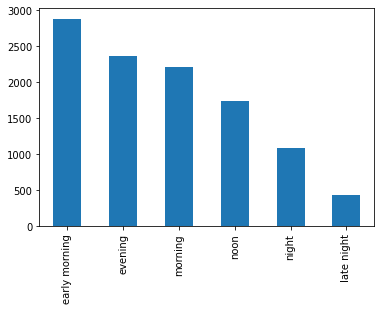

In [291]:
tmp_data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [292]:
# tmp_data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

### Process "Duration" feature

In [293]:
tmp_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [294]:
def convert_duration(x):
  if 'h' not in x:
    x = '0h ' + x
  elif 'm' not in x:
    x = x + ' 0m'
  return x

tmp_data['Duration'] = tmp_data['Duration'].apply(convert_duration)

### Couple of ways to convert duration
1. convert into two columns - hour, mins
2. Convert to mins - this is not preferred as the range of values increases and causes outliers which will affect the model negatively. Scaling the value may benifit.

In [295]:
# tmp_data['Duration'][0].split(' ')[0][0:-1]
# tmp_data['Duration'][0].split(' ')[1][0:-1]
tmp_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25


In [296]:
tmp_data['Duration_hours'] = tmp_data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))
tmp_data['Duration_mins'] = tmp_data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))
# tmp_data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))
# tmp_data.drop('Duration', axis=1, inplace=True)
tmp_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


### Analyze duration impacts on price

In [297]:
tmp_data['Duration_total_mins'] = tmp_data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)
tmp_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140


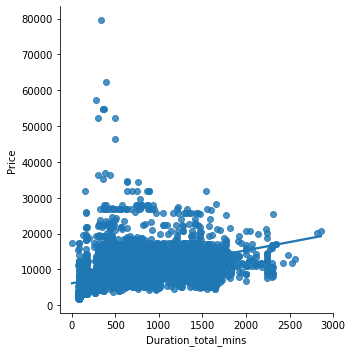

In [298]:
sns.lmplot(x='Duration_total_mins', y='Price', data=tmp_data)

Observation: Most of the cases price increased with duration.

### How many flights per city?

In [299]:
# Find unique destinations in our data
tmp_data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot:>

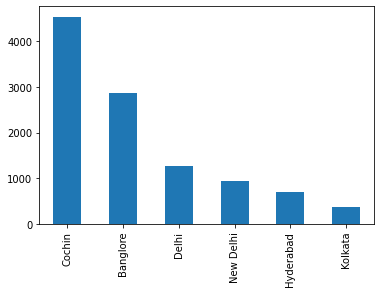

In [300]:
data['Destination'].value_counts().plot(kind='bar')

"Delhi" and "New Delhi" are same

<AxesSubplot:ylabel='Destination'>

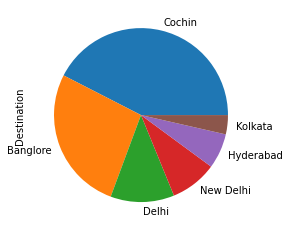

In [301]:
data['Destination'].value_counts().plot(kind='pie')

### Which route a specific airline uses the most?

In [302]:
# tmp_data[tmp_data['Airline'] == 'Jet Airways']
tmp_data[tmp_data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

### Airline vs price analysis
price distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

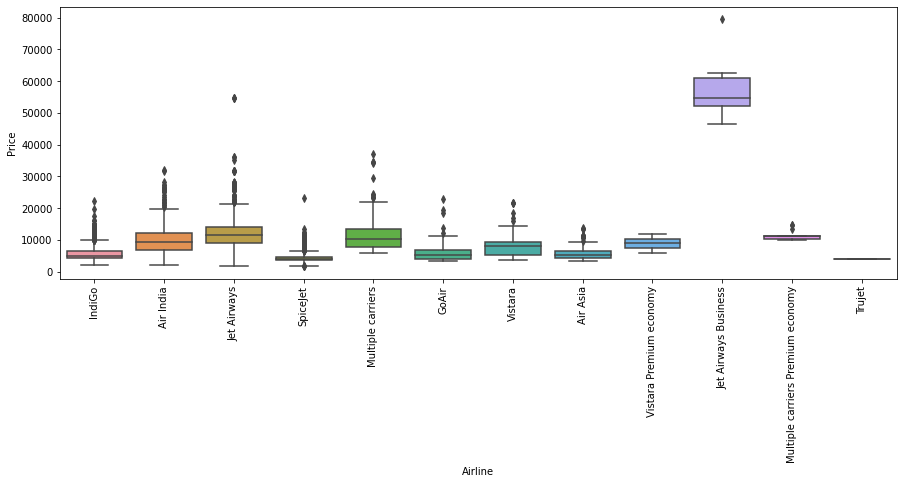

In [303]:
plt.figure(figsize=(15,5))
sns.boxplot(data=tmp_data, x="Airline", y="Price")
plt.xticks(rotation="vertical")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

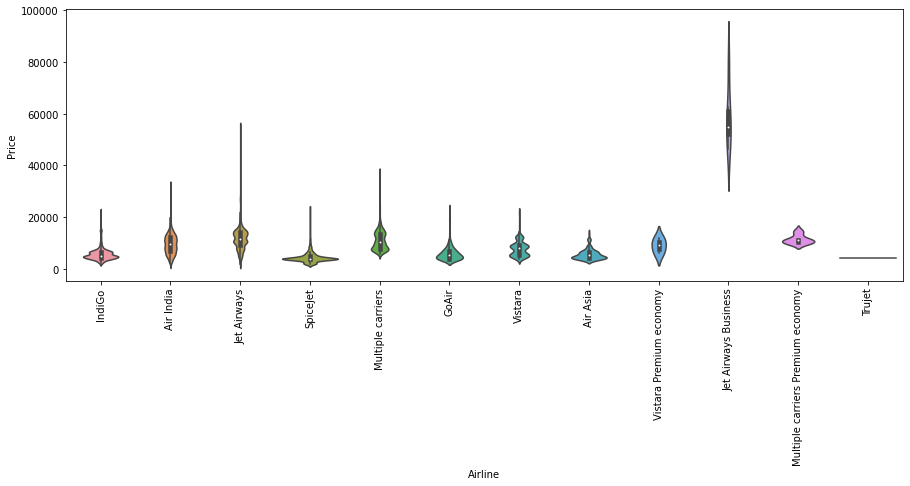

In [304]:
plt.figure(figsize=(15,5))
sns.violinplot(data=tmp_data, x="Airline", y="Price")
plt.xticks(rotation="vertical")

### Apply one-hot encoding

In [305]:
tmp_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [306]:
np.round(tmp_data['Additional_Info'].value_counts()/len(tmp_data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

Most of the cases(around 78%) - no info is provided => we can drop this feature.

In [307]:
tmp_data.drop(columns=['Additional_Info'], axis=1, inplace=True)

Route can be dropped as well as Total_stops gives the same info

In [308]:
tmp_data.drop(columns=['Route'], axis=1, inplace=True)

Other features that can be dropped

In [309]:
tmp_data.drop(columns=['Duration_total_mins', 'journey_year', 'Duration'],axis=1, inplace=True)


In [310]:
tmp_data.head(3)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0


Convert Airline, Source and destination 
Feature-encoding

In [311]:
categorical_col = [col for col in tmp_data.columns if tmp_data[col].dtype == 'object']
categorical_col

['Airline', 'Source', 'Destination', 'Total_Stops']

In [312]:
numerical_col = [col for col in tmp_data.columns if tmp_data[col].dtype != 'object']
numerical_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [313]:
tmp_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [314]:
tmp_data['Source'].unique()


array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [315]:
for source_loc in tmp_data['Source'].unique():
  tmp_data["Source" + source_loc ] = tmp_data["Source"].apply(lambda x: 1 if x == source_loc else 0)

tmp_data.head(3)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [316]:
tmp_data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

### Use Target guided encoding

In [317]:
tmp_data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [318]:
airlines = tmp_data.groupby(['Airline'])['Price'].mean().sort_values().index

In [319]:
airlines_dict = { each:idx for idx, each in enumerate(airlines) }
airlines_dict


{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [320]:
tmp_data['Airline'] = tmp_data['Airline'].map(airlines_dict)

In [321]:
tmp_data.head(3)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [322]:
# For destination 
tmp_data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

Destination has Delhi and New Delhi - which are both same

In [323]:
tmp_data['Destination'].replace("New Delhi", "Delhi", inplace=True)
tmp_data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [324]:
# Target guided encoding for destination
destinations = tmp_data.groupby(['Destination'])['Price'].mean().sort_values().index
destinations

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [325]:
destinations_dict = {k:v for v, k in enumerate(destinations)}
destinations_dict

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [326]:
tmp_data['Destination'] = tmp_data['Destination'].map(destinations_dict)
tmp_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [327]:
tmp_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [328]:
def encode_stops(x):
  if x == '1 stop':
    return 1
  if x == '2 stops':
    return 2
  if x == '3 stops':
    return 3
  if x == '4 stops':
    return 4
  else:
    return 0

# This can also be done useing a map 
# stops_map = {'non-stop':0, '1 stop':1, '2 stops':2, ...} and map it on tmp_data

In [329]:
tmp_data['Total_Stops'] = tmp_data['Total_Stops'].apply(encode_stops)

In [330]:
tmp_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


### Handling Outliers
1. Identify outlier
      1. Distribution
      2. Histogram
      3. Box plot
2. How to deal with Outlier

/Library/Python/3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Library/Python/3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Library/Python/3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



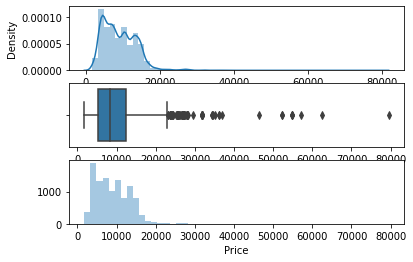

In [331]:
def plotting_fn(df, col):
  fig, (axis1, axis2, axis3) = plt.subplots(3, 1)
  sns.distplot(df[col], ax = axis1)
  sns.boxplot(df[col], ax = axis2)
  sns.distplot(df[col], ax = axis3, kde=False) # Disable kernel Desnity estimation

plotting_fn(tmp_data, 'Price')

/Library/Python/3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Library/Python/3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Library/Python/3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



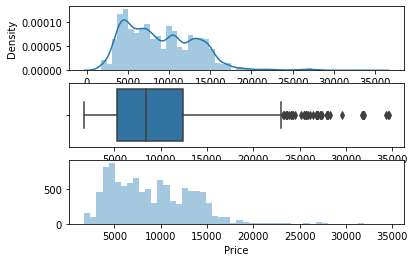

In [332]:
# Replace outliers with median of that feature.

tmp_data['Price'] = np.where(tmp_data['Price']>=35000, tmp_data['Price'].median(), tmp_data['Price'])
plotting_fn(tmp_data, 'Price')

### Select best features using Feature selection techniques

Find features which are important and contribute more to target

Ways:
1. SelectKBest - using score, 
   1. f-reg --> uses p-value
   2. mutual inforeg  --> correlation

In [333]:
tmp_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [334]:
# Dropping source as it is already encoded
tmp_data.drop(['Source'], axis=1, inplace=True)

In [335]:
tmp_data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [336]:
tmp_data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
SourceBanglore           int64
SourceKolkata            int64
SourceDelhi              int64
SourceChennai            int64
SourceMumbai             int64
dtype: object

In [337]:
from sklearn.feature_selection import mutual_info_regression
# Dependent(Price) vs independent(other features)
X = tmp_data.drop(['Price'], axis=1)
y = tmp_data['Price']

In [338]:
X.dtypes
mutual_info_regression(X, y)

array([0.97432838, 1.0032804 , 0.78967037, 0.17906368, 0.24815409,
       0.3352787 , 0.25432152, 0.40432291, 0.33957173, 0.46593555,
       0.34214709, 0.38403205, 0.45745952, 0.52214688, 0.12865205,
       0.20212677])

In [339]:
feat_imp = pd.DataFrame(mutual_info_regression(X,y), index=X.columns)
feat_imp.columns=['imp_score']
feat_imp.sort_values(by="imp_score", ascending=False)

,imp_score
Destination,1.007414
Airline,0.976865
Total_Stops,0.790006
SourceDelhi,0.512781
Duration_hours,0.474977
SourceKolkata,0.457471
Arrival_Time_hour,0.401810
SourceBanglore,0.382695
Arrival_Time_minute,0.352890
Dep_Time_hour,0.345372


In [356]:
# Split data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2)

In [341]:
y_test

7930      4441.0
8033     14151.0
8617     14151.0
3836     13555.0
8636      6442.0
          ...   
4474      9581.0
7366      7933.0
10357    14151.0
1267      6795.0
5929      3383.0
Name: Price, Length: 2137, dtype: float64

In [380]:
# Train the Linear regression model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred = pd.Series(y_pred)
print(y_pred, y_test)

0        9257.290000
1       18802.888333
2        4897.830000
3        9223.140000
4       15543.950000
            ...     
2132     5022.442500
2133     8953.830000
2134     5711.730000
2135    10800.195000
2136    11555.850000
Length: 2137, dtype: float64 8838     8603.0
6183    19225.0
4095     8040.0
230     14641.0
5712    15318.0
         ...   
9880     7229.0
3431     8085.0
3604     5228.0
1209    10991.0
3476    11522.0
Name: Price, Length: 2137, dtype: float64


### Define evaluation metrics
- Mean absolute percentage error (MAPE)
- MSE
- MAE
- RMSE
- R2_score

In [381]:
def mape(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)*100)

In [382]:
score_mape = mape(y_test, y_pred)

Training Score: 0.9513638579002706
r2_score: 81.0%
MAE: 1178.9474332395625
MSE: 3691806.1831870973
RMSE: 1921.4073444189542
MAPE: 13.193624414543777


/Library/Python/3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

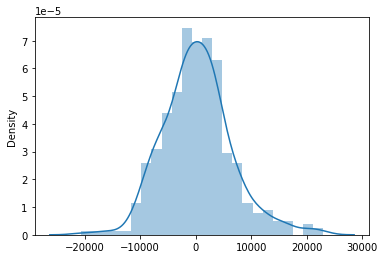

In [383]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
score = r2_score(y_test, y_pred)
score_mae = mean_absolute_error(y_test, y_pred)
score_mse = mean_squared_error(y_test, y_pred)
score_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Training Score: {}".format(regressor.score(X_train, y_train)))
print("r2_score: {}%".format(round(score, 2) *100))
print("MAE: {}".format(score_mae))
print("MSE: {}".format(score_mse))
print("RMSE: {}".format(score_rmse))
print("MAPE: {}".format(score_mape))
sns.distplot(y_test-y_pred)

### Hyperparameter Optimization
- Randomized search (faster)
- Grid search (slow as it uses permutation and combinations)

In [386]:
n_estimators = [int(x) for x in np.linspace(1000, 1200, 6)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, 4)]
min_samples_split = [5, 10, 15, 100]

from sklearn.model_selection import RandomizedSearchCV
reg_rf = RandomForestRegressor()
random_grid = {
  'n_estimators': n_estimators,
  'max_features': max_features,
  'max_depth': max_depth,
  'min_samples_split': min_samples_split
}
random_grid


{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [387]:
rf_random = RandomizedSearchCV(reg_rf, param_distributions=random_grid, cv=3, verbose=2, n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Library/Python/3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Python/3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Python/3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesReg

[CV] END max_depth=21, max_features=sqrt, min_samples_split=10, n_estimators=1120; total time=   9.7s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=10, n_estimators=1120; total time=   9.7s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=10, n_estimators=1120; total time=   9.8s
[CV] END max_depth=5, max_features=auto, min_samples_split=100, n_estimators=1000; total time=   9.7s
[CV] END max_depth=5, max_features=auto, min_samples_split=100, n_estimators=1000; total time=   9.7s
[CV] END max_depth=5, max_features=auto, min_samples_split=100, n_estimators=1000; total time=   9.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=10, n_estimators=1120; total time=  10.5s
[CV] END max_depth=13, max_features=auto, min_samples_split=10, n_estimators=1040; total time=  20.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=10, n_estimators=1120; total time=  10.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=10, n_estimators=1120;

/Library/Python/3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Python/3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=13, max_features=auto, min_samples_split=10, n_estimators=1040; total time=  20.6s


/Library/Python/3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=sqrt, min_samples_split=5, n_estimators=1040; total time=  11.2s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=5, n_estimators=1040; total time=  11.2s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=5, n_estimators=1040; total time=  11.2s
[CV] END max_depth=30, max_features=auto, min_samples_split=15, n_estimators=1160; total time=  23.3s
[CV] END max_depth=30, max_features=auto, min_samples_split=15, n_estimators=1160; total time=  23.5s
[CV] END max_depth=30, max_features=auto, min_samples_split=15, n_estimators=1160; total time=  23.6s


/Library/Python/3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Python/3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Python/3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesReg

[CV] END max_depth=13, max_features=sqrt, min_samples_split=100, n_estimators=1080; total time=   7.6s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=100, n_estimators=1080; total time=   7.6s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=100, n_estimators=1080; total time=   7.6s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=1160; total time=   9.7s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=1160; total time=   9.7s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=1160; total time=   9.8s
[CV] END max_depth=30, max_features=auto, min_samples_split=10, n_estimators=1000; total time=  17.6s
[CV] END max_depth=30, max_features=auto, min_samples_split=10, n_estimators=1000; total time=  17.5s
[CV] END max_depth=30, max_features=auto, min_samples_split=10, n_estimators=1000; total time=  17.4s
[CV] END max_depth=13, max_features=auto, min_samples_split=10, n_estimators=12

/Library/Python/3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [389]:
rf_random.best_params_
# y_pred_2 = rf_random.predict(X_test)


{'n_estimators': 1200,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [390]:
y_pred_2 = rf_random.predict(X_test)


Training Score: 0.9513638579002706
r2_score: 84.0%
MAE: 1157.8515639407708
MSE: 3207810.3603286664
RMSE: 1791.036113630506
MAPE: 13.193624414543777


/Library/Python/3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

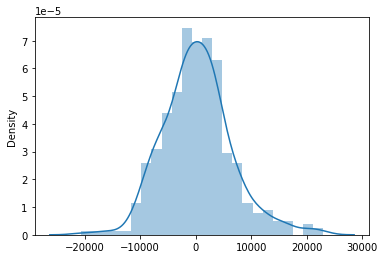

In [392]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
score = r2_score(y_test, y_pred_2)
score_mae = mean_absolute_error(y_test, y_pred_2)
score_mse = mean_squared_error(y_test, y_pred_2)
score_rmse = np.sqrt(mean_squared_error(y_test, y_pred_2))

print("Training Score: {}".format(regressor.score(X_train, y_train)))
print("r2_score: {}%".format(round(score, 2) *100))
print("MAE: {}".format(score_mae))
print("MSE: {}".format(score_mse))
print("RMSE: {}".format(score_rmse))
print("MAPE: {}".format(score_mape))
sns.distplot(y_test-y_pred)